In [5]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt


def cluster_jerarquico(datos):
  etiquetas = datos[0]
  tam = len(etiquetas)
  matriz = np.zeros([tam,tam])
  valores = np.transpose(datos[1:])
  for i in range(tam):
    aux = valores[i]
    for j in range(i+1, tam):
      aux2 = abs(aux - valores[j])
      suma = sum(aux2)
      matriz[j,i] = suma
  valores = list(valores)
  print(tabulate(matriz, headers=etiquetas, showindex=etiquetas), "\n")
  minimo = np.where(matriz == np.max(matriz[np.nonzero(matriz)]))
  minimo = (minimo[1][0],minimo[0][0])
  nueva_etiqueta = etiquetas.pop(minimo[0])
  nueva_etiqueta += etiquetas.pop(minimo[1]-1)
  valor1 = valores.pop(minimo[0])
  valor2 = valores.pop(minimo[1]-1)
  nuevo_valor = (valor1 + valor2) / 2
  etiquetas.insert(0, nueva_etiqueta)
  valores.insert(0, nuevo_valor)
  valores = list(np.transpose(valores))
  valores.insert(0, etiquetas)
  if np.shape(matriz) == (2,2):
    return None
  else:
    return cluster_jerarquico(valores)


datos = [["A","B","C","D","E"],
         [1,2,4,7,5],
         [1,1,5,7,7]]

cluster_jerarquico(datos)

      A    B    C    D    E
--  ---  ---  ---  ---  ---
A     0    0    0    0    0
B     1    0    0    0    0
C     7    6    0    0    0
D    12   11    5    0    0
E    10    9    3    2    0 

      AD    B    C    E
--  ----  ---  ---  ---
AD     0    0    0    0
B      5    0    0    0
C      1    6    0    0
E      4    9    3    0 

      BE    AD    C
--  ----  ----  ---
BE   0       0    0
AD   0.5     0    0
C    1.5     1    0 

       BEC    AD
---  -----  ----
BEC   0        0
AD    0.75     0 



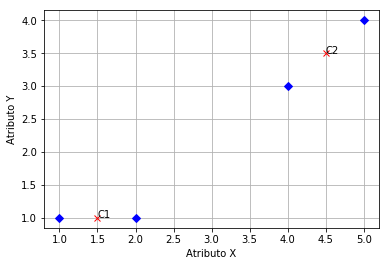

In [4]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

def kmeans(datos, centroides):
  etiquetas = datos[0]
  n_obj = len(etiquetas)
  numero = len(centroides)
  matriz = np.zeros([numero,n_obj])
  valores = np.transpose(datos[1:])
  centroidesD = {}
  for i in range(numero):
    centroidesD.update({"c"+str(i+1):{"x":0,"y":0,"c":0}})
    c = centroides[i]
    for j in range(n_obj):
      aux2 = (c - valores[j]) ** 2
      suma = sum(aux2)
      matriz[i,j] = (suma) ** (1/2)
  matriz_aux = np.transpose(matriz)
  for i in range(len(matriz_aux)):
    item = matriz_aux[i]
    if item[0] < item[1]:
      matriz_aux[i][0] = 1
      matriz_aux[i][1] = 0
      centroidesD["c1"]["c"] += 1
      centroidesD["c1"]["x"] += valores[i,0]
      centroidesD["c1"]["y"] += valores[i,1] 
    else:
      matriz_aux[i][0] = 0
      matriz_aux[i][1] = 1
      centroidesD["c2"]["c"] += 1
      centroidesD["c2"]["x"] += valores[i,0]
      centroidesD["c2"]["y"] += valores[i,1] 
  nuevo_centroide = [
      [centroidesD["c1"]["x"]/centroidesD["c1"]["c"],centroidesD["c1"]["y"]/centroidesD["c1"]["c"]],
      [centroidesD["c2"]["x"]/centroidesD["c2"]["c"],centroidesD["c2"]["y"]/centroidesD["c2"]["c"]]
  ]
  matriz_aux = np.transpose(matriz_aux)
  if centroides == nuevo_centroide:
    for v in valores:
      plt.plot(v[0],v[1],"D",color="blue")
    cont = 1
    for c in nuevo_centroide:
      plt.plot(c[0],c[1],"x",color="red")
      plt.annotate("C{}".format(cont),c)
      cont += 1
    plt.grid()
    plt.xlabel("Atributo X")
    plt.ylabel("Atributo Y")
    plt.show()
    return None
  else:
    return kmeans(datos, nuevo_centroide)
datos = [["M1","M2","M3","M4"],
         [1,2,4,5],
         [1,1,3,4]]
centroides = [[1,1], [2,1]]
kmeans(datos,centroides)